# Menace

Welcome to the Menace Jupyter Notebook interface! This notebook contains examples of how to run the pipeline on a dataset, load the resulting output dataframes and perform analysis and visualisation using seaborn.  **If you are using Menace as part of any published scientific work, please cite  "".**

In [2]:
import menace

In [1]:
import sys
sys.version

'2.7.12 |Continuum Analytics, Inc.| (default, Jul  2 2016, 17:43:17) \n[GCC 4.2.1 (Based on Apple Inc. build 5658) (LLVM build 2336.11.00)]'

In [4]:
import menace.lib.Community

In [5]:
from menace.__main__ import *

In [6]:
#config = menace.get_config()
args = get_parser().parse_args(['full'])
config = read_config(args)
config = compile_config(args,config)

## Load Abundance and Relative C periods

In [ ]:
#data = menace.load_data()

In [7]:
import pandas as pd
import numpy as np
from os.path import join

In [8]:
ptr = pd.DataFrame.from_csv(join(config['output_path'],"Collect","PTR.csv"),  sep=';',index_col=-2)
ab = pd.DataFrame.from_csv(join(config['output_path'],"Collect","Abundance.csv"),  sep=';')
ab_ptr = pd.DataFrame.from_csv(join(config['output_path'],"Collect","AbundancePTR.csv"),  sep=';')

IOError: File /Users/hedani/Documents/GitRepos/PTRloc/tt/Out/Collect/PTR.csv does not exist

## Visualization

In [200]:
%matplotlib inline
import seaborn as sns
import numpy
import matplotlib.pyplot as plt
#sns.set(style="default")

In [50]:
pwd

u'/Users/hedani/Documents/GitRepos/PTRloc/tt'

In [67]:
#ptr.to_csv('out.csv',index=False)
#ab.to_csv('ab_corr.csv',index=False)
ptr.ix[:,:20].to_csv('out.csv',index=False)
ab.ix[:,:20].to_csv('ab_corr.csv',index=False)

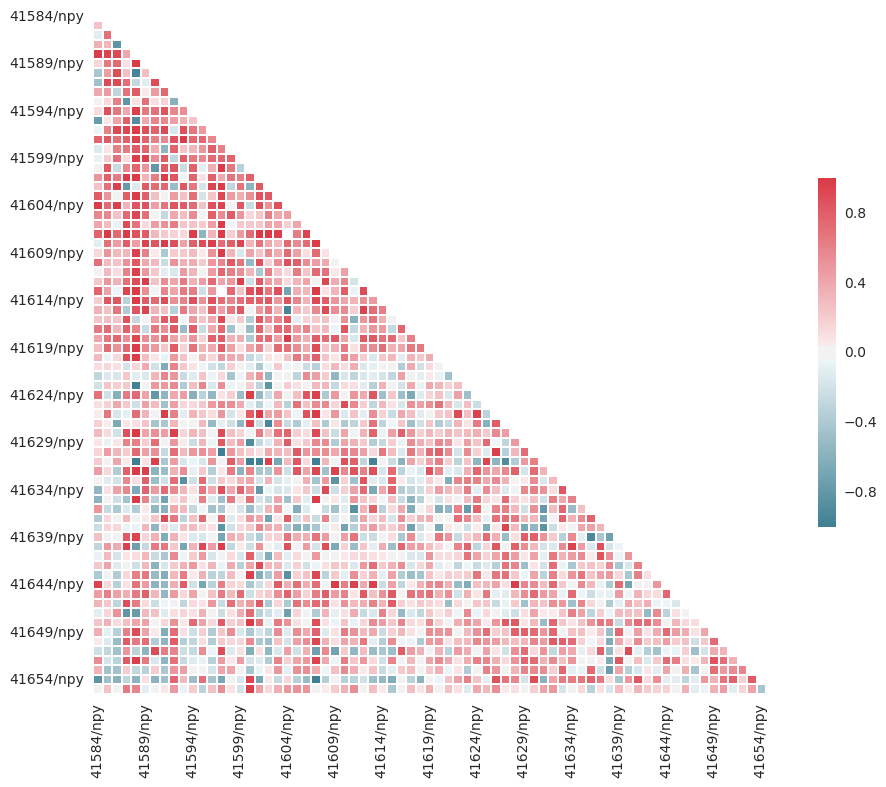

In [64]:
#corr=ptr.ix[:,:10].corr()


# Generate a mask for the upper triangle
mask = np.zeros_like(ptr.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(ptr.corr(), mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

#ax = sns.heatmap(ptr.corr())
#fig = ax.get_figure()
#fig.savefig('ptr.pdf')

In [128]:
#g=sns.FacetGrid(ptr, col="Name")
#g=map(sns.distplot, "ptr")

In [ ]:
ptr=ptr.fillna(1)

In [129]:
ptr.index.values

array(['Acidaminococcus fermentans DSM 20731, complete genome',
       'Acidaminococcus intestini RyC-MR95, complete genome',
       'Adlercreutzia equolifaciens DSM 19450 DNA, complete genome',
       'Akkermansia muciniphila ATCC BAA-835, complete genome',
       'Alistipes finegoldii DSM 17242, complete genome',
       'Alistipes shahii WAL 8301 draft genome',
       'Bacteroides fragilis YCH46 DNA, complete genome',
       'Bacteroides thetaiotaomicron VPI-5482 chromosome, complete genome',
       'Bacteroides vulgatus ATCC 8482, complete genome',
       'Bacteroides xylanisolvens XB1A draft genome',
       'Bifidobacterium adolescentis ATCC 15703 DNA, complete genome',
       'Bifidobacterium breve ACS-071-V-Sch8b, complete genome',
       'Bifidobacterium breve UCC2003, complete genome',
       'Bifidobacterium dentium Bd1, complete genome',
       'Butyrate-producing bacterium SS3/4, complete genome',
       'Butyrate-producing bacterium SSC/2, complete genome',
       'Campylob

In [138]:
from scipy.stats import norm

In [205]:
df=pd.DataFrame(columns=['Bacteroides','Butyrate-producing bacterium','Faecalibacterium','Ruminococcus','Streptococcus','Other'])
df.ix[:,0]=ptr.ix[bac].mean()
df.ix[:,1]=ptr.ix[but].mean()
df.ix[:,2]=ptr.ix[fec].mean()
df.ix[:,3]=ptr.ix[rum].mean()
df.ix[:,4]=ptr.ix[strep].mean()
df.ix[:,5]=ptr.ix[other].mean()

In [206]:
sns.set_context("paper")

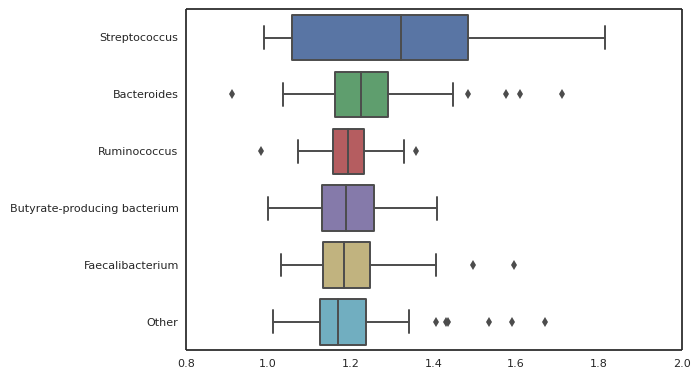

In [208]:
bac=['Bacteroides thetaiotaomicron VPI-5482 chromosome, complete genome',
       'Bacteroides vulgatus ATCC 8482, complete genome',
       'Bacteroides xylanisolvens XB1A draft genome']

but=['Butyrate-producing bacterium SS3/4, complete genome',
       'Butyrate-producing bacterium SSC/2, complete genome']

fec=['Faecalibacterium prausnitzii L2-6, complete genome',
       'Faecalibacterium prausnitzii SL3/3 draft genome']

rum=['Ruminococcus bromii L2-63 draft genome',
       'Ruminococcus obeum A2-162 draft genome',
       'Ruminococcus sp. SR1/5 draft genome',
       'Ruminococcus torques L2-14 draft genome']

strep=['Streptococcus salivarius CCHSS3 complete genome',
       'Streptococcus salivarius JIM8777 complete genome']

other=['Odoribacter splanchnicus DSM 20712, complete genome',
       'Parabacteroides distasonis ATCC 8503, complete genome',
       'Roseburia hominis A2-183, complete genome']

#for i in b:
#    v=ptr.ix[i]
#    sns.distplot(v)

#f, ax = plt.subplots(figsize=(9, 7))
#sns.boxplot(ptr.ix[bac].mean())#,hist=False,ax=ax)#, label='Bacteroides thetaiotaomicron')
#sns.boxplot(ptr.ix[but].mean())#,hist=False,ax=ax, label='Butyrate-producing bacterium')
#sns.boxplot(ptr.ix[fec].mean())#,hist=False,ax=ax, label='Faecalibacterium prausnitzii')
#sns.boxplot(ptr.ix[rum].mean())#,hist=False,ax=ax, label='Ruminococcus')
g=sns.boxplot(df,orient="h",order=df.median().sort_values(ascending=False).index.values)
#g.set_xticklabels(df.columns,rotation=30)

In [106]:
ptr.ix[:,['41593/npy','41613/npy']];

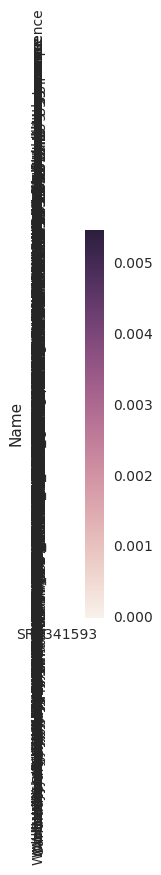

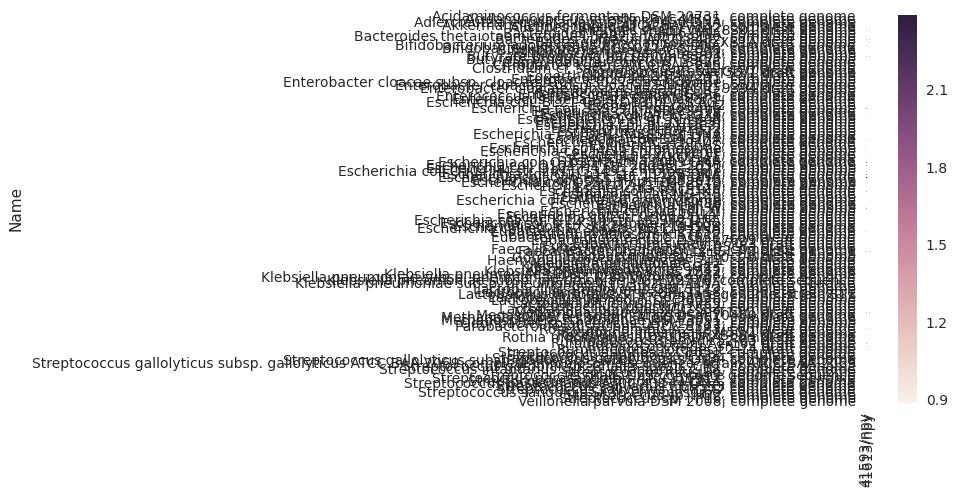

In [102]:
f, ax = plt.subplots(figsize=(7, 5))
f1, ax1 = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(ab.ix[:,0:1],linewidths=.5,square=True,ax=ax)
#ax1 = sns.heatmap(ptr.ix[:,['41593/npy','41613/npy']],linewidths=.5,square=True,ax=ax1)

In [2]:
#ab=ab.loc['Name'].isin(ptr.loc['Name'])
#ab=ab.sort('Name')
#ab=ab.sort_index(axis=1)
ax = sns.heatmap(ptr.ix[100:130])
#fig = ax.get_figure()
#fig.savefig('ab.pdf')

NameError: name 'sns' is not defined

In [34]:
df1 = ptr.where((pd.notnull(ptr)), 0)

ValueError: color kwarg must have one color per dataset

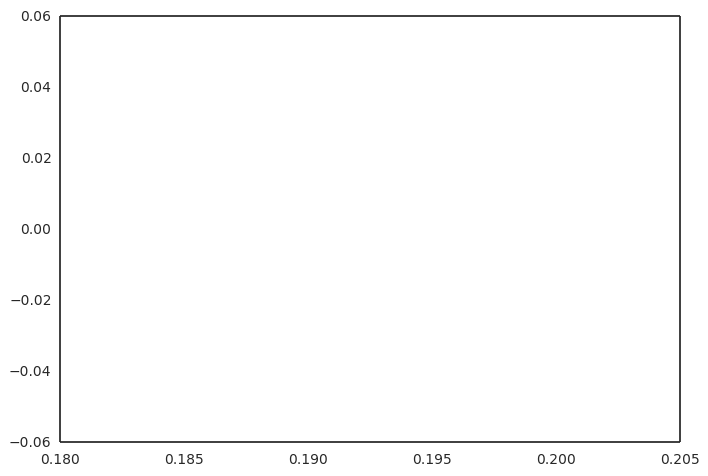

In [35]:
sns.distplot(df1)

In [22]:
ax = sns.heatmap(ab_ptr)
fig = ax.get_figure()

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

## Run a Menace Docker Container

In [1]:
import docker

## Perform tests on artificial metagenomic communities

In [1]:
import menace.lib.Community as Comm
#import docker

In [2]:
#cli = docker.from_env()

In [3]:
#cli = docker.Client(base_url='unix://var/run/docker.sock')
img = 'sysbio-chalmers/menace'
#envs = docker.utils.parse_env_file(join(td,'env_centos'))
envs = ""

In [4]:
acc=['NC_000913.3','NC_007779.1','NC_002655.2','NC_009614.1','NC_017218.1']
growth_param=[[.2, .5, .3, 100],[.2, .5, .3, 100],[.2, .5, .3,100],[0.0001, .8, .2, 100],[.1, .7, .2,100]]
sel=[[0,4]]
td=u'/Users/hedani/Documents/GitRepos/PTRloc/tt_MenaceNB'
accessions=[acc[s] for s in sel[0]]
community_params=[growth_param[s] for s in sel[0]]

In [5]:
c=Comm.Community('comm0',[acc[s] for s in sel[0]],[growth_param[s] for s in sel[0]],td,'bowtie2',img,envs,'hedani@chalmers.se')

AttributeError: 'DockerClient' object has no attribute 'create_container' In Docker SDK for Python 2.0, this method is now on the object APIClient. See the low-level API section of the documentation for more details.

In [11]:
c=Comm.Community('comm0',[acc[s] for s in sel[0]],[growth_param[s] for s in sel[0]],td,'bowtie2',img,envs,'hedani@chalmers.se')
c.build_index()
tot_reads=np.linspace(10**5,10**5,1)
for nr in tot_reads:
    c.sample(nr)
c.write_reads()
c.run_pipeline()
c.collect()

TypeError: create_mount_run() takes exactly 5 arguments (4 given)

In [18]:
create_mount_run('sysbio-chalmers/menace','/Users/Shared/CommTest','basmenace -c /mnt/vol/comm0/project.conf -h','')

"/opt/conda/bin/menace: line 3: __requires__: command not found\n/opt/conda/bin/menace: line 4: import: command not found\n/opt/conda/bin/menace: line 5: import: command not found\n/opt/conda/bin/menace: line 6: from: command not found\n/opt/conda/bin/menace: menace: line 9: syntax error near unexpected token `('\n/opt/conda/bin/menace: menace: line 9: `    sys.argv[0] = re.sub(r'(-script\\.pyw?|\\.exe)?$', '', sys.argv[0])'\n"

In [10]:
import docker
cli = docker.from_env()

In [15]:
cli = docker.APIClient(base_url='unix://var/run/docker.sock')